### Урок 3. TensorFlow

1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston (или Fashion_mnist).

2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

4. (сложный вариант*) Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [56]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [41]:
data = load_boston()
data.data.shape

(506, 13)

In [42]:
data.target.shape

(506,)

In [45]:
# Для начала попробуем с нормализованными данными
scaler = MinMaxScaler()
scaler.fit(data.data)
norm_data = scaler.transform(data.data)
norm_data

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [72]:
# Что-ж, начнем
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(13, )))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='MSE',
              optimizer='adam',
              metrics=['MeanSquaredError'])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [64]:
x_train, x_test, y_train, y_test = train_test_split(norm_data, data.target, test_size=0.33, random_state=42)

In [73]:
model.fit(x_train, y_train, epochs=5, batch_size=10, validation_split=0.2)

Epoch 1/5
28/28 [==============================] - 0s 5ms/step - loss: 591.5854 - mean_squared_error: 591.5854 - val_loss: 540.0629 - val_mean_squared_error: 540.0629
Epoch 2/5
28/28 [==============================] - 0s 1ms/step - loss: 547.1709 - mean_squared_error: 547.1709 - val_loss: 495.8776 - val_mean_squared_error: 495.8776
Epoch 3/5
28/28 [==============================] - 0s 1ms/step - loss: 502.0967 - mean_squared_error: 502.0967 - val_loss: 449.0495 - val_mean_squared_error: 449.0495
Epoch 4/5
28/28 [==============================] - 0s 1ms/step - loss: 453.6297 - mean_squared_error: 453.6297 - val_loss: 398.4498 - val_mean_squared_error: 398.4498
Epoch 5/5
28/28 [==============================] - 0s 1ms/step - loss: 401.1739 - mean_squared_error: 401.1740 - val_loss: 345.2628 - val_mean_squared_error: 345.2628


In [74]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 314.8455 - mean_squared_error: 314.8455


[314.8454895019531, 314.8454895019531]

In [87]:
# Как-то так - базовая получается
# Пробуем ширину по-варьировать
results = []
for i in range(5):
    num_units = [13, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
    result = []
    for units in num_units:
        model = Sequential()
        model.add(Dense(units=units, activation='relu', input_shape=(13, )))
        model.add(Dense(units=1, activation='linear'))
        model.compile(loss='MSE',
                      optimizer='adam',
                      metrics=['MeanSquaredError'])
        model.fit(x_train, y_train, epochs=5, batch_size=10, validation_split=0.2, verbose=0)
        result.append(model.evaluate(x_test, y_test)[0])
    results.append(result)

6/6 [==============================] - 0s 3ms/step - loss: 30.0469 - mean_squared_error: 30.0469


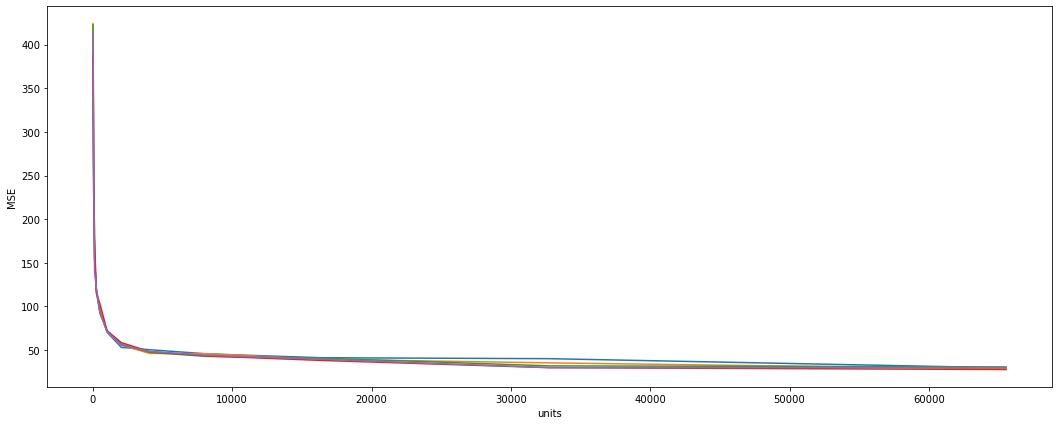

In [88]:
plt.figure(figsize=(18,7))
for result in results:
    plt.plot(num_units, result)
plt.xlabel('units')
plt.ylabel('MSE')
plt.draw()

In [31]:
# Впринципе и так было по логам видно - улучшается с ростом количества нейронов
# Не удалось дойти до момента когда качество перестает рости - но это как-то тупо наверное такими количествами оперировать
# Попробуем может быть в глубину

In [103]:
results = []
for i in range(5):
    result = []
    for num_layers in range(20):
        model = Sequential()
        model.add(Dense(units=128, activation='relu', input_shape=(13, )))
        for layers in range(num_layers):
            model.add(Dense(units=128, activation='relu'))
        model.add(Dense(units=1, activation='linear'))
        model.compile(loss='MSE',
                      optimizer='adam',
                      metrics=['MeanSquaredError'])
        model.fit(x_train, y_train, epochs=5, batch_size=10, validation_split=0.2, verbose=0)
        result.append(model.evaluate(x_test, y_test)[0])
    results.append(result)

6/6 [==============================] - 0s 1ms/step - loss: 37.2022 - mean_squared_error: 37.2022


6/6 [==============================] - 0s 1ms/step - loss: 27.3043 - mean_squared_error: 27.3043


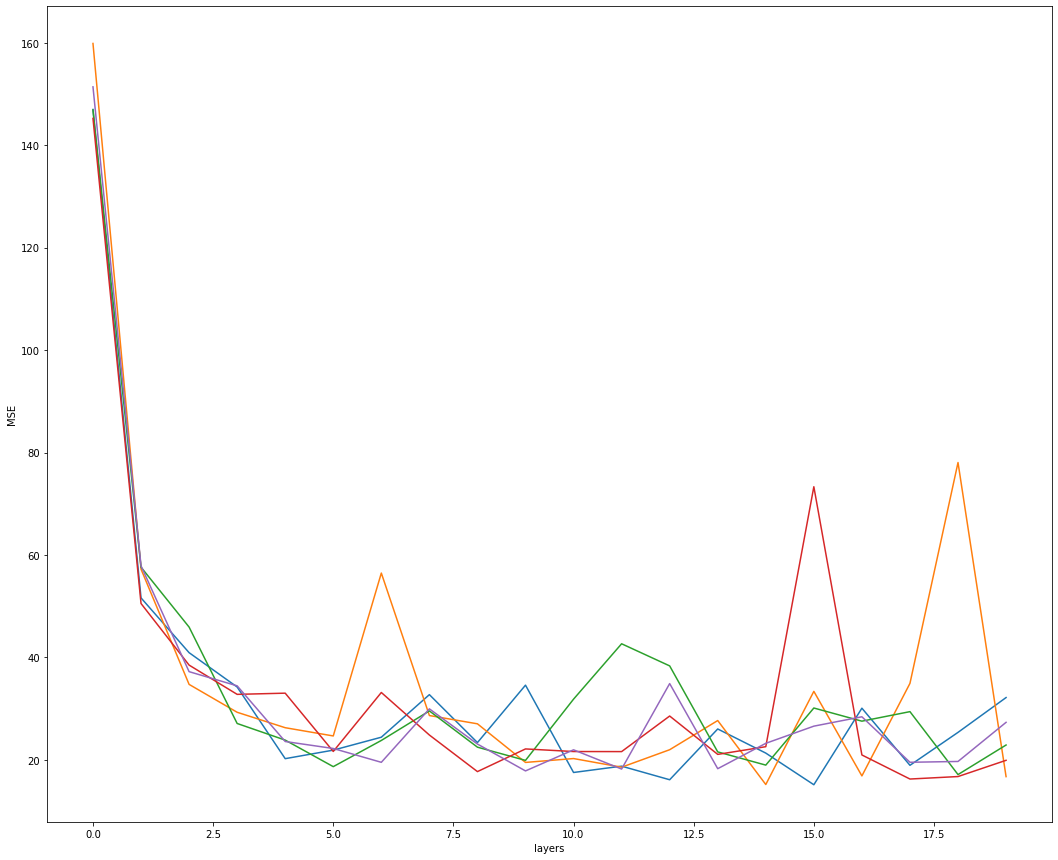

In [104]:
plt.figure(figsize=(18,15))
for result in results:
    plt.plot(range(20), result)
plt.xlabel('layers')
plt.ylabel('MSE')
plt.draw()

In [105]:
# С увеличением количества слоев больше 5-ти не очень стабильно начинает себя вести. 
# Возьмем 5 и попробуем увеличить количество эпох

In [132]:
results = []
for i in range(5):
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(13, )))
    for layers in range(5):
        model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='MSE',
                  optimizer='adam',
                  metrics=['MeanSquaredError'])
    results.append(model.fit(x_train, y_train, epochs=200, batch_size=10, validation_split=0.2, verbose=0))
    model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 728us/step - loss: 12.6436 - mean_squared_error: 12.6436


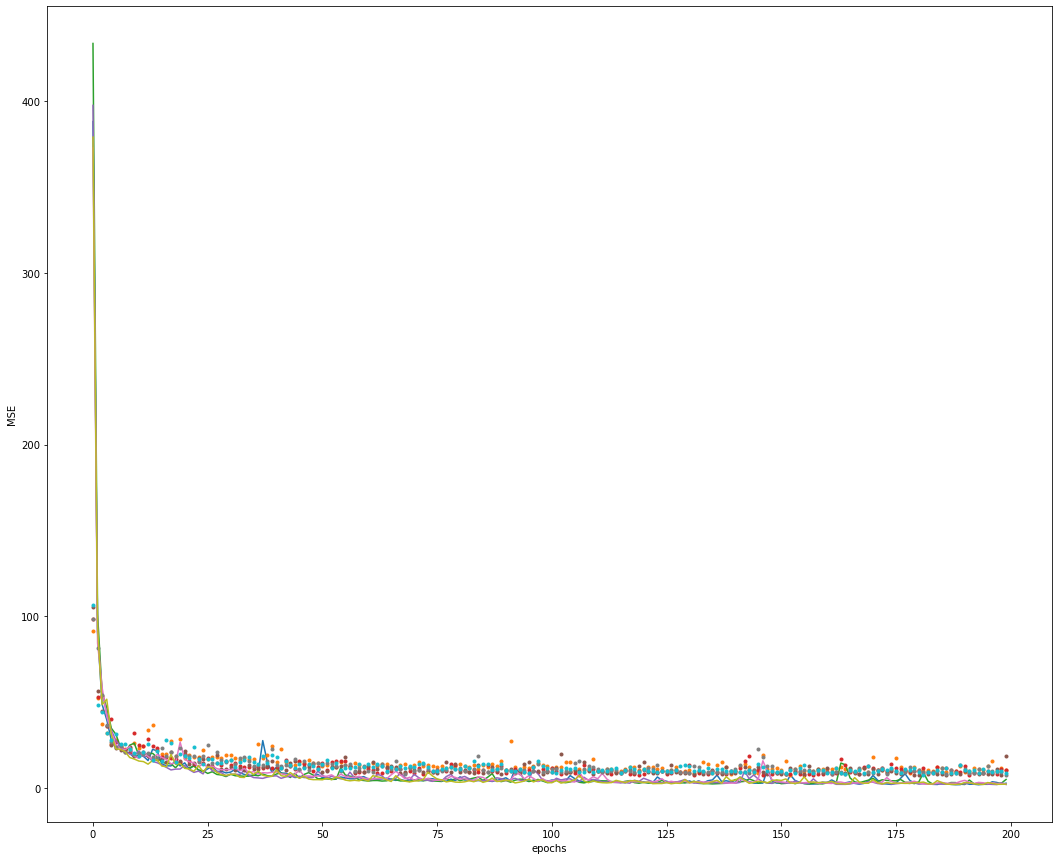

In [130]:
plt.figure(figsize=(18,15))
for result in results:
    plt.plot(range(200), result.history['mean_squared_error'])
    plt.plot(range(200), result.history['val_mean_squared_error'], '.')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.draw()

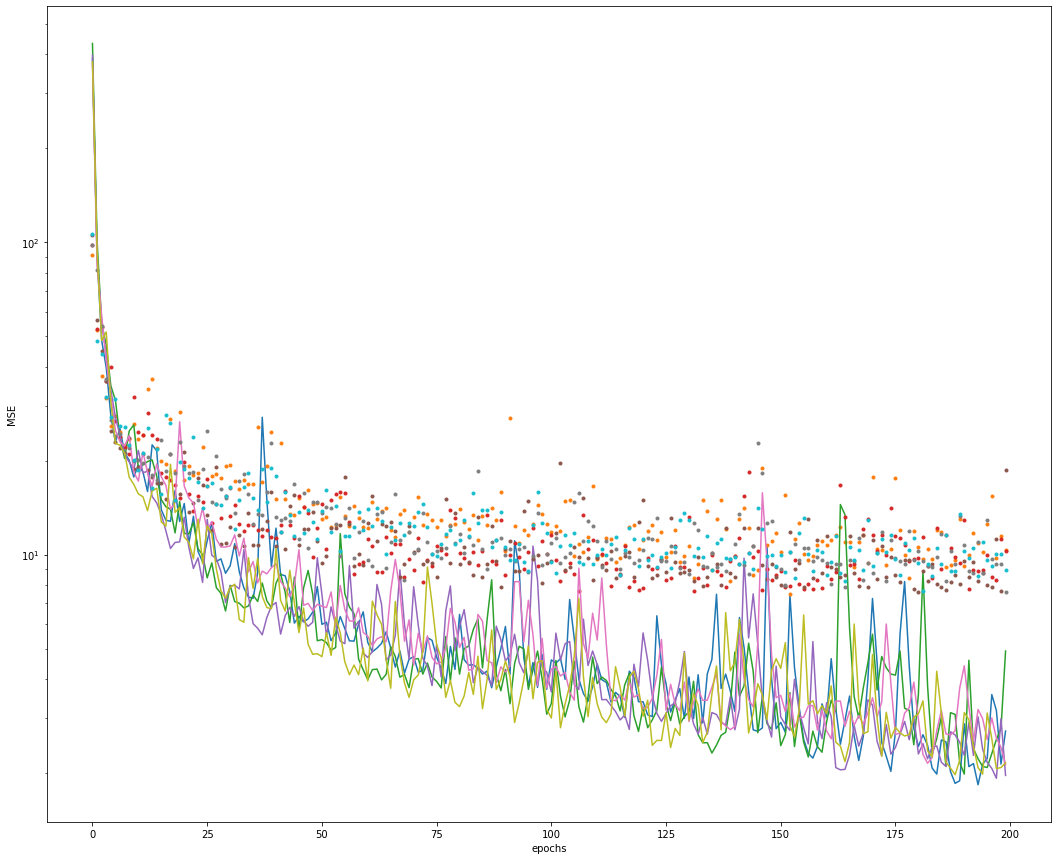

In [131]:
# Ничего так не разобрать - попробуем log scale
plt.figure(figsize=(18,15))
for result in results:
    plt.plot(range(200), result.history['mean_squared_error'])
    plt.plot(range(200), result.history['val_mean_squared_error'], '.')
ax = plt.gca()
ax.set_yscale('log')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.draw()

In [133]:
# Получается даже после 200 эпох качество растет на трейне, а на тесте после 100 эпох уже не сильно изменяется
# Между 8 и 12 (примем 10 как среднее)
# Поскольку это MSE то получается ошибка - корень из 10 - что приблизительно - 3 (тыс. долл.) - цена у нас в тыс. $
# Много это или мало - я уже не помню )) мы конечно-же рассматривали этот датасет на курсе уже в контексте ML моделей

In [136]:
# Как я понял - готового аналога R2 score в keras нет..
# Нашел в сети нечто...
from tensorflow.keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [144]:
results1 = []
for i in range(5):
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(13, )))
    for layers in range(5):
        model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='MSE',
                  optimizer='adam',
                  metrics=[coeff_determination])
    results1.append(model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0))
    model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 11.8737 - coeff_determination: 0.8524


In [138]:
# Все-таки метрика такого рода мне кажется более привычной

In [143]:
# Пробуем менять оптимизатор
results2 = []
for i in range(5):
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(13, )))
    for layers in range(5):
        model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='MSE',
                  optimizer='nadam',
                  metrics=[coeff_determination])
    results2.append(model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0))
    model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 799us/step - loss: 11.2052 - coeff_determination: 0.8630


In [142]:
results3 = []
for i in range(5):
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(13, )))
    for layers in range(5):
        model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='MSE',
                  optimizer='SGD',
                  metrics=[coeff_determination])
    results3.append(model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0))
    model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 842us/step - loss: nan - coeff_determination: nan


In [145]:
results3 = []
for i in range(5):
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(13, )))
    for layers in range(5):
        model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='MSE',
                  metrics=[coeff_determination])
    results3.append(model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0))
    model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 745us/step - loss: 42.1482 - coeff_determination: 0.4213


In [146]:
results4 = []
for i in range(5):
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(13, )))
    for layers in range(5):
        model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='MSE',
                  optimizer='adagrad',
                  metrics=[coeff_determination])
    results4.append(model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0))
    model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 818us/step - loss: 18.8124 - coeff_determination: 0.7594


In [152]:
# Adam самый результативный для этой задачи (как пишут он вообще самый результативный в 90% задач)
# SGD почему-то не взлетел вообще

In [148]:
# Попробуем еще разные функции потерь - хотя не особо представляю для регресии что может быть лучше MSE
results5 = []
for i in range(5):
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(13, )))
    for layers in range(5):
        model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='MAE',
                  optimizer='adam',
                  metrics=[coeff_determination])
    results5.append(model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0))
    model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 812us/step - loss: 2.8283 - coeff_determination: 0.8116


In [149]:
results6 = []
for i in range(5):
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(13, )))
    for layers in range(5):
        model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='MAPE',
                  optimizer='adam',
                  metrics=[coeff_determination])
    results6.append(model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0))
    model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 10.7781 - coeff_determination: 0.8464


In [150]:
results7 = []
for i in range(5):
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(13, )))
    for layers in range(5):
        model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='MSLE',
                  optimizer='adam',
                  metrics=[coeff_determination])
    results7.append(model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0))
    model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 770us/step - loss: 0.0266 - coeff_determination: 0.8631


In [151]:
# Вобщем MSE вне конкуренции из того, что я попробовал

In [153]:
# Еще парочка тестов на подбор активационной функции
results7 = []
for i in range(5):
    model = Sequential()
    model.add(Dense(units=128, input_shape=(13, )))
    for layers in range(5):
        model.add(Dense(units=128))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='MSLE',
                  optimizer='adam',
                  metrics=[coeff_determination])
    results7.append(model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0))
    model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 799us/step - loss: 0.0795 - coeff_determination: 0.5512


In [155]:
results8 = []
for i in range(5):
    model = Sequential()
    model.add(Dense(units=128, activation='elu', input_shape=(13, )))
    for layers in range(5):
        model.add(Dense(units=128, activation='elu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='MSLE',
                  optimizer='adam',
                  metrics=[coeff_determination])
    results8.append(model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0))
    model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0348 - coeff_determination: 0.8012


In [157]:
results9 = []
for i in range(5):
    model = Sequential()
    model.add(Dense(units=128, activation='selu', input_shape=(13, )))
    for layers in range(5):
        model.add(Dense(units=128, activation='selu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='MSLE',
                  optimizer='adam',
                  metrics=[coeff_determination])
    results9.append(model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0))
    model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0357 - coeff_determination: 0.7946


In [158]:
# ReLU - самая удачная. Полностью линейная сеть - самая слабая получилась

In [159]:
# В таблицу поке не свёл..
# И с IMDB датасетом тоже очень хочется повозиться честно говоря...